### CondensateDynamics.jl research notes
# Results collection and plotting

In [1]:
using Pkg
Pkg.activate(".")

using LaTeXStrings, Plots
import GR
using CondensateDynamics
using OrdinaryDiffEq
using DiffEqCallbacks
using LSODA
import CondensateDynamics.V
import FFTW
gr()
GR.usecolorscheme(1)

# =========================================================
## 1D-GPE 
L = (40.0,)
N = (1024,)
sim = Sim{length(L), Array{Complex{Float64}}}(L=L, N=N)
initial_state = zeros(N[1])

@unpack_Sim sim
iswitch = -im
equation = GPE_1D
manual = true
solver = SplitStep
time_steps = 10000
g_param = 0.5865 *0
g = - 2 * g_param # right??

@info "gamma: " g_param
if equation==NPSE && g_param > 2/3 
    @warn "we should expect NPSE collapse"
end

n = 100
as = - g_param / n
#mu_analytical = npse_mu(n, as)
abstol = 1e-12
maxiters = 10000
dt = 0.022

x = X[1]
k = K[1]
dV= volume_element(L, N)

flags = FFTW.EXHAUSTIVE

tf = Inf
# SPR condensate bright soliton t in units of omega_perp^-1
analytical_gs = zeros(N)
@. analytical_gs = sqrt(g_param/2) * 2/(exp(g_param*x) + exp(-x*g_param))

psi_0 .= exp.(-x.^2/2)
psi_0 = psi_0 / sqrt(ns(psi_0, sim))
initial_state .= psi_0

if equation == NPSE
    sigma2 = init_sigma2(g) 
end

@. V0 = 1/2*(x.^2)
display(V0)
@info "minimum sigma2" (minimum(sigma2.(psi_0)))
kspace!(psi_0, sim)

@pack_Sim! sim



  Activating new project at `~/software/CondensateDynamics.jl/examples`


1024-element Vector{ComplexF64}:
              200.0 - 0.0im
 199.21875074651538 - 0.0im
  198.4390303565405 - 0.0im
 197.66083883007542 - 0.0im
 196.88417616712007 - 0.0im
 196.10904236767448 - 0.0im
 195.33543743173863 - 0.0im
 194.56336135931255 - 0.0im
 193.79281415039623 - 0.0im
 193.02379580498965 - 0.0im
                    ⋮
 193.79281415039623 + 0.0im
 194.56336135931255 + 0.0im
 195.33543743173863 + 0.0im
 196.10904236767448 + 0.0im
 196.88417616712007 + 0.0im
 197.66083883007542 + 0.0im
  198.4390303565405 + 0.0im
 199.21875074651538 + 0.0im
              200.0 + 0.0im

┌ Info: gamma: 
│   g_param = 0.0
└ @ Main /home/lorenzi/software/CondensateDynamics.jl/examples/linear-GS.ipynb:31
┌ Info: minimum sigma2
│   minimum(sigma2.(psi_0)) = 1.0
└ @ Main /home/lorenzi/software/CondensateDynamics.jl/examples/linear-GS.ipynb:64


Sim{1, Array{ComplexF64}}
  equation: EquationType
  manual: Bool true
  solver: Solver
  graphics: Bool false
  alg: Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}
  reltol: Float64 0.001
  abstol: Float64 1.0e-12
  maxiters: Int64 10000
  flags: UInt32 0x00000008
  iswitch: ComplexF64
  L: Tuple{Float64}
  N: Tuple{Int64}
  dV: Float64 0.0390625
  Vol: Float64 40.0
  ti: Float64 0.0
  tf: Float64 Inf
  tspan: Array{Float64}((2,)) [0.0, 1.0]
  dt: Float64 0.022
  time_steps: Int64 10000
  g: Float64 -0.0
  gamma: Float64 0.0
  mu: Float64 0.0
  sigma2: sigma2 (function of type CondensateDynamics.var"#sigma2#3"{Float64})
  params: Params
  V0: Array{ComplexF64}((1024,)) ComplexF64[200.0 - 0.0im, 199.21875074651538 - 0.0im, 198.4390303565405 - 0.0im, 197.66083883007542 - 0.0im, 196.88417616712007 - 0.0im, 196.10904236767448 - 0.0im, 195.33543743173863 - 0.0im, 194.56336135931255 - 0.0im, 193.79281415039623 - 0.0im, 193.0237958049896

┌ Info: 1.5655562339887354
└ @ CondensateDynamics /home/lorenzi/.julia/packages/CondensateDynamics/JdL1R/src/solver.jl:195
┌ Info: Running on manual GS mode: maxiters =  
│   maxiters = 10000
└ @ CondensateDynamics /home/lorenzi/.julia/packages/CondensateDynamics/JdL1R/src/solver.jl:10
┌ Info: 10000
└ @ CondensateDynamics /home/lorenzi/.julia/packages/CondensateDynamics/JdL1R/src/solver.jl:18


 Interation number: 178

 Interation number: 354 - norm diff: 0.005450249205905355

 Interation number: 380 - norm diff: 0.005450249206066977

 Interation number: 557

 Interation number: 733 - norm diff: 0.0054502492061424814

 Interation number: 909

 Interation number: 1019 - norm diff: 0.0054502492061424745

 Interation number: 1192

 Interation number: 1365 - norm diff: 0.005450249206142473

 Interation number: 1539 - norm diff: 0.00545024920614247

 Interation number: 1713 - norm diff: 0.005450249206142472

 Interation number: 1716

 Interation number: 1890

 Interation number: 2064

 Interation number: 2238

 Interation number: 2412

 Interation number: 2525

 Interation number: 2699

 Interation number: 2873

 Interation number: 3047

 Interation number: 3221

 Interation number: 3232 - norm diff: 0.005450249206142472

 Interation number: 3406 - norm diff: 0.005450249206142472

 Interation number: 3580 - norm diff: 0.005450249206142472

 Interation number: 3754 - norm diff: 0.005450249206142472

 Interation number: 3928 - norm diff: 0.005450249206142463

 Interation number: 4009 - norm diff: 0.00545024920614247

 Interation number: 4184

 Interation number: 4358 - norm diff: 0.005450249206142472

 Interation number: 4532 - norm diff: 0.005450249206142472

 Interation number: 4707

 Interation number: 4778 - norm diff: 0.005450249206142472

 Interation number: 4952 - norm diff: 0.00545024920614247

 Interation number: 5126 - norm diff: 0.005450249206142469

 Interation number: 5300 - norm diff: 0.005450249206142465

 Interation number: 5396 - norm diff: 0.00545024920614247

 Interation number: 5570 - norm diff: 0.005450249206142465

 Interation number: 5744 - norm diff: 0.005450249206142472

 Interation number: 5919

 Interation number: 6093

 Interation number: 6159

 Interation number: 6333

 Interation number: 6507 - norm diff: 0.005450249206142472

 Interation number: 6681 - norm diff: 0.005450249206142473

 Interation number: 6855 - norm diff: 0.005450249206142473

 Interation number: 6918 - norm diff: 0.005450249206142473

 Interation number: 7092 - norm diff: 0.005450249206142473

 Interation number: 7266 - norm diff: 0.005450249206142472

 Interation number: 7440 - norm diff: 0.005450249206142474

 Interation number: 7614 - norm diff: 0.005450249206142472

 Interation number: 7722 - norm diff: 0.00545024920614247

 Interation number: 7897

 Interation number: 8071 - norm diff: 0.005450249206142473

 Interation number: 8245 - norm diff: 0.00545024920614247

 Interation number: 8420

 Interation number: 8493 - norm diff: 0.005450249206142472

 Interation number: 8667 - norm diff: 0.005450249206142472

 Interation number: 8842

Excessive output truncated after 524303 bytes.

 Interation number: 8901

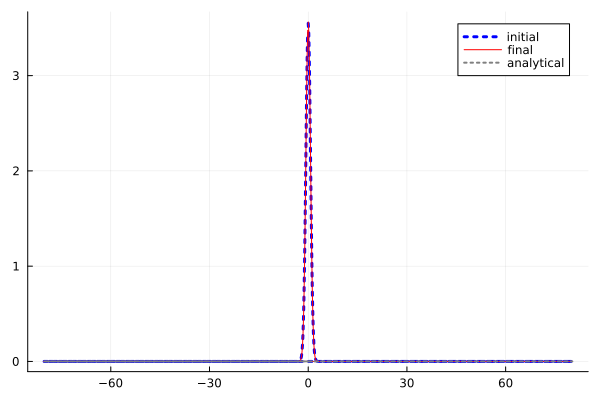

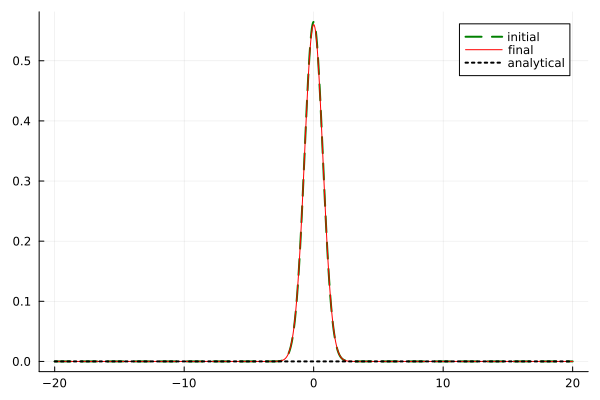

In [2]:
# =========================================================

sol = runsim(sim; info=true)
final = sol.u

@info "chempot of analytical" chempot(analytical_gs, sim)
@info "final chempot" chempotk(final, sim)
#@info "analytical calculation of chempot" mu_analytical

p = plot(real.(k), abs2.(kspace(initial_state, sim)), color=:blue, ls=:dot, lw=3, label="initial")

plot!(p, real.(k), abs2.(final), color=:red, label="final")
plot!(p, real.(k), abs2.(kspace(analytical_gs, sim)), ls=:dot, lw=2, color=:grey, label="analytical")
display(p)

xspace!(final, sim)

middle = Int(round(N[1]/2))
reduced_x = real.(x)[middle-10:middle+10]
p = plot(real.(x), abs2.(initial_state), color=:green, ls=:dash, lw=2, label="initial")
plot!(p, real.(x), abs2.(final), color=:red, label="final")
plot!(p, real.(x), abs2.(analytical_gs), ls=:dot, lw=2, color=:black, label="analytical")
#plot!(p, real.(x), abs.(V0), ls=:dash, lw=2, color=:yellow, label="potential")

display(p)

In [3]:
using Pkg
using Revise
Pkg.activate("..")

using CondensateDynamics, OrdinaryDiffEq, LSODA
import CondensateDynamics.V
using CUDA
using LaTeXStrings, Plots
import GR
using CUDA.CUFFT
import Makie, GLMakie
import JLD2

include("plot_axial_evolution.jl")
include("plot_isosurfaces.jl")

save_path = "results/"
use_precomputed = false
# ================ plotting functions

gr()
GR.usecolorscheme(1)

# =================== simulation settings
L = (40.0,40.0,40.0)
N = (512, 128, 128)
sim = Sim{length(L), CuArray{Complex{Float64}}}(L=L, N=N)

# =================== physical parameters
@unpack_Sim sim

# "collapse is visible "

g_param = 0.0
g = - g_param * 4 * pi

gamma = 0.0
mu = 0.0

equation = GPE_3D
solver = SplitStep
manual = true
iswitch = -im
reltol = 1e-5
abstol = 1e-6
dt = 4
x0 = 0.0
vv = 0.0

x = Array(X[1])
y = Array(X[2])
z = Array(X[3])
dV= volume_element(L, N)
tf = 2.0

Nt = 30
t = LinRange(ti,tf,Nt)
maxiters = 150

tmp = [exp(-((x-x0)^2+y^2+z^2)) * exp(-im*x*vv) for x in x, y in y, z in z]
psi_0 = CuArray(tmp)

tmp = [exp(-((x-x0)^2+y^2+z^2)/2) * exp(-im*x*vv) for x in x, y in y, z in z]
analytic = CuArray(tmp)
analytic .= analytic / sqrt(sum(abs2.(analytic) * dV))

psi_0 .= psi_0 / sqrt(sum(abs2.(psi_0) * dV))
initial_state = zeros(size(psi_0))
copy!(initial_state, psi_0)
initial_state = CuArray(initial_state)

kspace!(psi_0, sim)
alg = BS3()

tmp = [1/2*(x^2 + y^2 + z^2) for x in x, y in y, z in z]
V0 = CuArray(tmp)
@pack_Sim! sim


# problems: vedo il potenziale longitudinale, ma non fa quello che dovrebbe (funzione d'onda sempre più grande di quanto dovrebbe essere)

Sim{3, CuArray{ComplexF64}}
  equation: EquationType
  manual: Bool true
  solver: Solver
  graphics: Bool false
  alg: BS3{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}
  reltol: Float64 1.0e-5
  abstol: Float64 1.0e-6
  maxiters: Int64 150
  flags: UInt32 0x00000000
  iswitch: ComplexF64
  L: Tuple{Float64, Float64, Float64}
  N: Tuple{Int64, Int64, Int64}
  dV: Float64 0.00762939453125
  Vol: Float64 64000.0
  ti: Float64 0.0
  tf: Float64 2.0
  tspan: Array{Float64}((2,)) [0.0, 1.0]
  dt: Float64 4.0
  time_steps: Int64 5000
  g: Float64 -0.0
  gamma: Float64 0.0
  mu: Float64 0.0
  sigma2: sigma2 (function of type CondensateDynamics.var"#sigma2#3"{Float64})
  params: Params
  V0: CuArray{ComplexF64, 3, CUDA.Mem.DeviceBuffer}
  psi_0: CuArray{ComplexF64, 3, CUDA.Mem.DeviceBuffer}
  nfiles: Bool false
  Nt: Int64 30
  t: LinRange{Float64, Int64}
  path: String "/home/lorenzi/.julia/packages/CondensateDynamics/JdL1R/src"
  filename: S

In [4]:
# ===================== simulation
@info "computing GPE_3D" 
if isfile(join([save_path, "3d_gs.jld2"])) && use_precomputed
    @info "\t using precomputed solution 3d_gs.jld2" 
    JLD2.@load join([save_path, "3d_gs.jld2"]) u
else
    sol = runsim(sim; info=true)
    u = sol.u
    # JLD2.@save join([save_path, "3d_gs.jld2"]) u
end


512×128×128 CuArray{ComplexF64, 3, CUDA.Mem.DeviceBuffer}:
[:, :, 1] =
 -4.17459e-5+1.05763e-5im  …   4.07257e-5-1.35958e-5im
  4.11221e-5-1.23399e-5im     -3.99755e-5+1.53032e-5im
 -3.85987e-5+1.78894e-5im       3.7057e-5-2.06346e-5im
  3.26967e-5-2.62004e-5im     -3.05757e-5+2.84624e-5im
 -2.15997e-5+3.48659e-5im       1.8903e-5-3.62594e-5im
  4.57706e-6-3.96408e-5im  …  -1.62589e-6+3.97508e-5im
  1.58685e-5+3.51742e-5im     -1.83727e-5-3.38013e-5im
 -3.23838e-5-1.80787e-5im      3.35317e-5+1.55854e-5im
  3.45155e-5-7.99912e-6im     -3.37271e-5+1.04999e-5im
 -1.63371e-5+2.94073e-5im      1.40735e-5-3.04439e-5im
            ⋮              ⋱  
 -1.29963e-5+3.10289e-5im      1.06322e-5-3.18096e-5im
  3.35653e-5-1.13437e-5im     -3.25355e-5+1.37552e-5im
 -3.38155e-5-1.52336e-5im  …   3.47453e-5+1.2651e-5im
  1.84131e-5+3.39115e-5im     -2.08095e-5-3.23581e-5im
  2.13764e-6-3.98469e-5im       8.1472e-7+3.97757e-5im
 -1.98629e-5+3.58837e-5im      1.71011e-5-3.71432e-5im
  3.17102e-5-2.7386

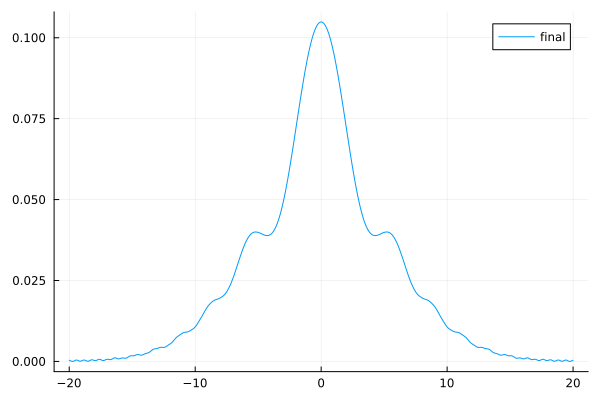

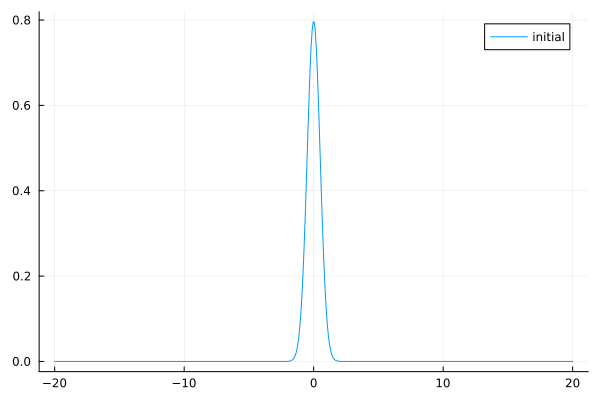

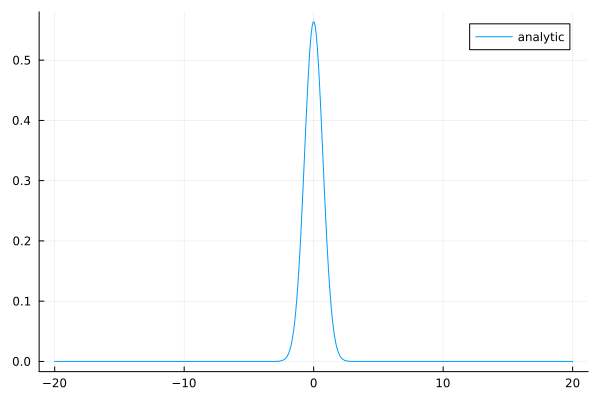

In [10]:
# =================== plotting and collect 
p = plot_final_density([u], sim, 1; info=false, label="final")
q = plot_final_density([initial_state], sim, 1; info=false, doifft=false, label="initial")
q2 = plot_final_density([analytic], sim, 1; info=false, doifft=false, label="analytic")
#s2 = estimate_sigma2(u, sim)
# q = plot(sim.X[1] |> real, s2, label="bella zio")
# display(q)
#@info "Building animation..."
#isosurface_animation(u, length(u), sim; framerate=5)
@info "Completed."